<a href="https://colab.research.google.com/github/estrelmm/Data-Science/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---
<img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

# Airbnb - Data Analytics - *Dublin, Ireland*


[Airbnb](https://www.airbnb.com.br/) stands for AirBed & Breakfast named in 2008 when it was officially founded. 

Airbnb is designed to connect traveller with hosts who want to rent their rooms in a practical and economical way. 

Now, Airbnb has operations in 191 countries and is able to rent out a room, a home, or even a castle for a night or longer.


<center><img src="https://airbnb370.files.wordpress.com/2016/11/airbnb-infographic.png?w=650&h=506"width="30%"></center>



According to the IrishTimes "In 2018, Airbnb was worth more than €700 million to the Irish economy.
The figure puts Ireland 20th in the list of Airbnb’s direct economic impact figures, behind Croatia, Portugal and Spain.

In Ireland, some 1.8 million visitors stayed in accommodation listed on the Airbnb site, spending an average of €116 per day of their trip or €537 million over the year. Hosts, meanwhile, earned almost €168 million from Airbnb"


Airbnb has provide data for the main cities iin the world. It can be accessed on the portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), it's possible download hu
ge quantities of data to be used on projects of *Data Science*.


**This *notebook*, I'm going to analyse the datas from Dublin, Ireland and see which insights can be extracted from raw data.**

## Obtenção dos Dados


Datas provided by [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

For this explanatory analyse, was downloaded *listings.csv* - Summary information and metrics for listings in Ireland (good for visualisations).

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv ("http://data.insideairbnb.com/ireland/2020-04-22/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id - number identification
* name - owner's name 
* host_id - host number identification
* host_name - host name
* neighbourhood_group


Bellow is displayed the *dataset* for 5 first entries

In [115]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,last_review,calculated_host_listings_count,availability_365
0,30314099,Location | Ensuite Double Room | Parking,139583941,Immanuel,Dublin City Council,Ballyfermot-Drimnagh LEA-5,53.33021,-6.33360,Private room,65,1,2,0,2019-01-02,1,0
1,21167665,Doble bedroom in walkinstown,24183424,Marcos,Dublin City Council,Ballyfermot-Drimnagh LEA-5,53.31961,-6.32238,Private room,40,3,1,0,2017-10-14,2,0
2,22511860,Private room close to city centre,165220897,Killian,Dublin City Council,Ballyfermot-Drimnagh LEA-5,53.32573,-6.32507,Private room,32,1,3,0,2018-01-30,1,0
3,25482966,Our house,192326095,Karen,Dublin City Council,Ballyfermot-Drimnagh LEA-5,53.32511,-6.32213,Entire home/apt,100,1,0,0,NaN,1,0
4,28931156,Spacious one bed apartment close to city centre,132442775,Clo,Dublin City Council,Ballyfermot-Drimnagh LEA-5,53.34141,-6.32737,Entire home/apt,100,2,2,1,2019-04-23,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

This block display the types of variables and its total.

This *dataset* is the sum up version downloaded from *listings.csv* file. There are a complete version which contains bigger data than this one.

In [80]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print ("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 28201
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
number_of_reviews_ltm               int64
last_review                        object
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [81]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

last_review                       0.150881
host_name                         0.000106
name                              0.000071
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews_ltm             0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

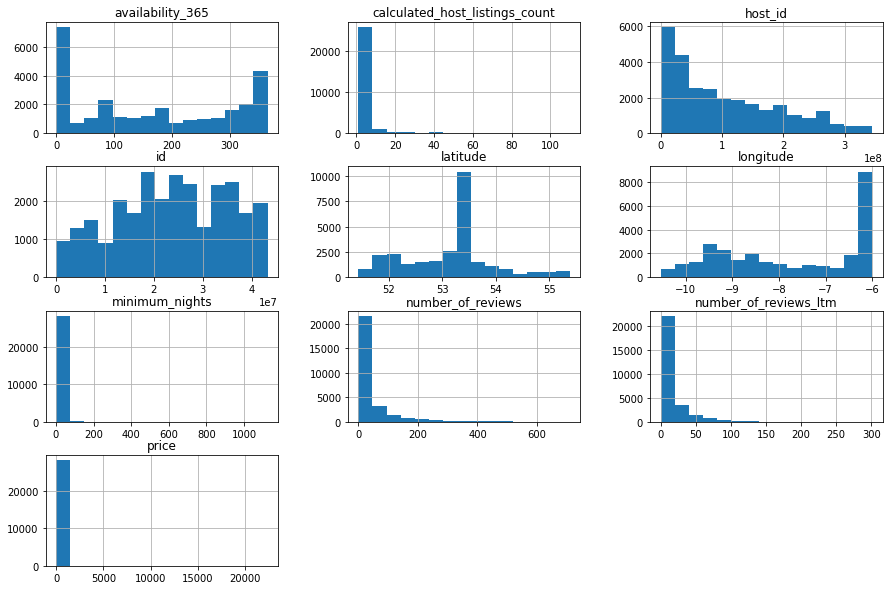

In [82]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há outliers presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

Resumo estatístico por meio do método describe()
Plotar boxplots para a variável.

In [84]:
[ ] # ver o resumo estatistico das variaveis numericas
df[['price', 'minimum_nights', 'number_of_reviews', 'number_of_reviews_ltm',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,availability_365
count,28201.000000,28201.000000,28201.000000,28201.000000,28201.000000,28201.000000
mean,114.980284,2.916989,37.535903,12.987412,4.694904,166.407822
std,224.427282,13.416049,63.893351,19.809832,12.055973,134.861354
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,52.000000,1.000000,2.000000,0.000000,1.000000,19.000000
50%,80.000000,2.000000,12.000000,5.000000,2.000000,159.000000
75%,120.000000,2.000000,43.000000,17.000000,3.000000,306.000000
max,22337.000000,1125.000000,710.000000,301.000000,110.000000,365.000000


Histogramas sem Outliers

Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

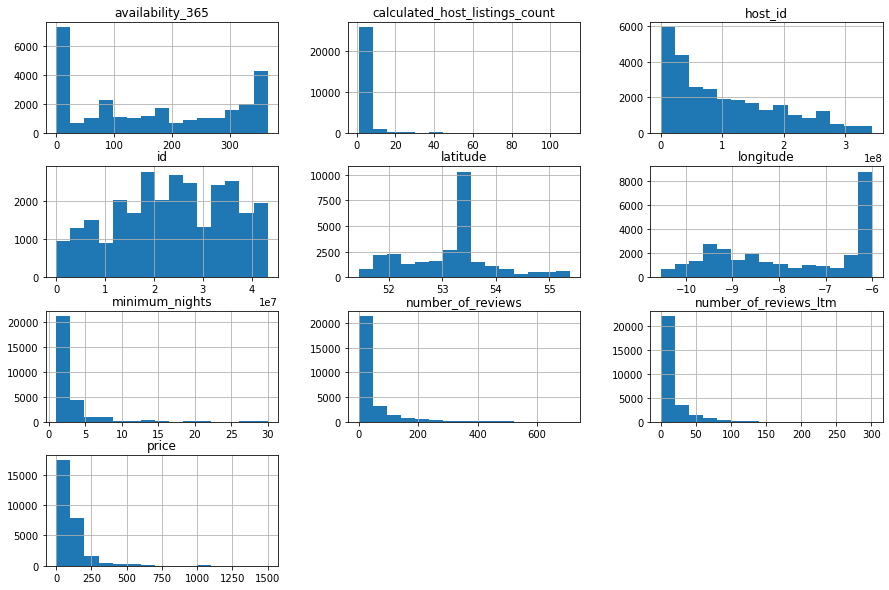

In [129]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)


# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

In [86]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'number_of_reviews_ltm',
'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)



,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,availability_365
price,1.000000,0.087019,-0.094045,-0.087798,0.072113,0.025278
minimum_nights,0.087019,1.000000,-0.075651,-0.110490,-0.017007,-0.073453
number_of_reviews,-0.094045,-0.075651,1.000000,0.786796,-0.083188,0.062467
number_of_reviews_ltm,-0.087798,-0.110490,0.786796,1.000000,-0.084437,0.064936
calculated_host_listings_count,0.072113,-0.017007,-0.083188,-0.084437,1.000000,0.144185
availability_365,0.025278,-0.073453,0.062467,0.064936,0.144185,1.000000


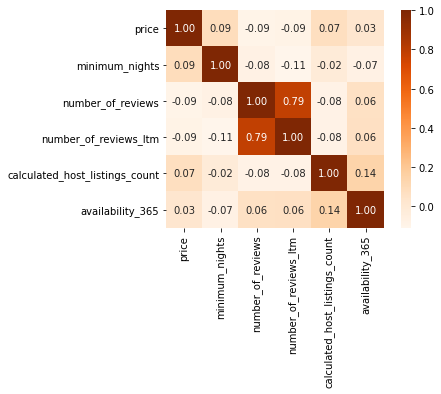

In [87]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap='Oranges', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [88]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    15503
Private room       11938
Hotel room           366
Shared room          249
Name: room_type, dtype: int64

In [89]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.552573
Private room       0.425506
Hotel room         0.013045
Shared room        0.008875
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [132]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10]

neighbourhood_group
Louth County Council                     137.296636
Dublin City Council                      133.990651
Kilkenny County Council                  122.742291
Galway City Council                      118.732174
Dun Laoghaire-rathdown County Council    116.848008
Kerry County Council                     109.535813
Waterford City And County Council        108.893657
Cork County Council                      106.494211
Tipperary County Council                 106.352423
Clare County Council                     104.364169
Name: price, dtype: float64

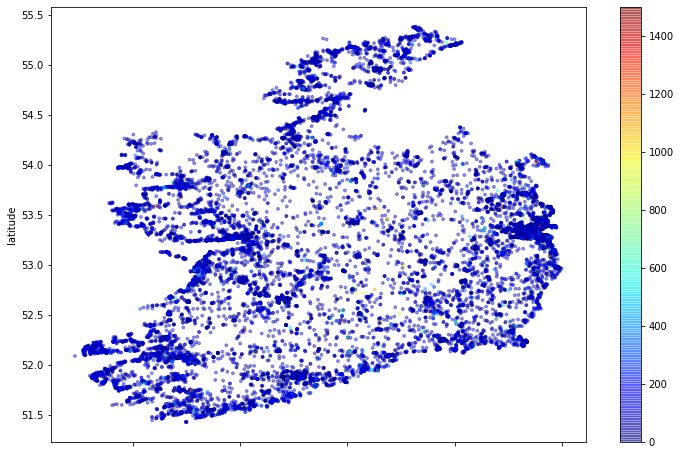

In [91]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'],
              s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [111]:
# ver a média da coluna `minimum_nights``

df['minimum_nights'].mean()


2.9169887592638557

In [113]:
df['neighbourhood_group'].value_counts()

Dublin City Council                      6934
Kerry County Council                     2909
Cork County Council                      1904
Donegal County Council                   1855
Galway County Council                    1717
Clare County Council                     1537
Mayo County Council                      1234
Galway City Council                      1152
Dun Laoghaire-rathdown County Council     958
Fingal County Council                     795
Wexford County Council                    697
Wicklow County Council                    591
Waterford City And County Council         544
Sligo County Council                      521
Cork City Council                         509
Kilkenny County Council                   457
Tipperary County Council                  455
Meath County Council                      452
Limerick City And County Council          444
Kildare County Council                    344
South Dublin County Council               341
Louth County Council              

## Conclusões
